# Introduction

This data set represents collected information about known shark attack incidents dating all the way back to the year 1900

Sharks scare me, so this dataset is particularly interesting to me, so I thought it would be a great subject to explore and study.

My primary goal of this study is two fold, first, I want to know what the data looks like and find interesting patterns and insights in it, secondly, I want to know if I can extract a model that would be able to predict the likelyhood of a fatality once a shark attack does occur.

I hope I can get both of those goals achieved, but no matter the outcome, I will document it here for any reviewer to see and share this exporatory journey with me.

# Questions

<h3>My aim of this study is to answer some fundemental questions about this data set</h3>

1- How does the number of attacks change when looked at against the variables related to the victims of the attacks?

2- Which activities have a higher chance of exposing us to shark attacks? 
    - I believe this to be a crucial question as it can provide insight on which activities we need to be careful doing to avoid any risk of shark attacks.

3- Where do most shark attacks occur? and is this data consistent throughout the year or does it change seasonaly? 
    - I ask this question to take into consideration possible shark migrations or vacation seasons where people are more likely to be in certain countries or more likely to spend more time in beaches or oceans.

4- In the scenario of a shark attack occurring, is there any modeling we can do that could predict the likelyhood of surviving the attack given the data in this dataset?


# ---
import all required tools and libraries to being our analysis

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sen
sen.set()
import numpy as np

In [2]:
df = pd.read_excel('sharks_adjusted.xlsx')

# draw basic insights from the initial state of our dataset¶

* A quick view of the top and bottom portions of the dataset

In [3]:
df.head(10)

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Investigator or Source
0,1900.01.28,1900-01-28,Unprovoked,Australia,New South Wales,"Lane Cove River, Sydney Harbor (Estuary)",Fishing,Charles Duck,M,Unknown,Right posterior thigh bitten,N,"Poverty Bay Herald, 2/12/1900"
1,1900.07.00,1900-07-01,Provoked,USA,Connecticut,"Bridgeport, Fairfield County",Fishing,"skiff with Dr. William T. Healey, Dr. Henry Ca...",M,Unknown,"No injury to occupants. They shot shark, then ...",N,"Times, 8/1/1900"
2,1900.07.14,1900-07-14,Invalid,USA,Hawaii,"Makapu'u Point, O'ahu",Fishing,Emil Uhlbrecht & unidentified person,M,Unknown,"Believed drowned. Uhlbrecht’s foot, and the pe...",Y,"Los Angeles Times, 7/28/1900"
3,1900.07.31,1900-07-31,Unprovoked,Croatia,Primorje-Gorski Kotar County,"Volosko, Opatija",Swimming,male,M,Unknown,FATAL,Y,"C. Moore, GSAF"
4,1900.08.21,1900-08-21,Unprovoked,USA,North Carolina,"Southport, Brunswick County",Swimming,Burris,M,Unknown,Left hand lacerated,N,"C. Creswell, GSAF"
5,1900.09.05,1900-09-05,Unprovoked,USA,Hawaii,"Waikiki Beach, Oahu",Swimming,Joe Hartman,M,Unknown,"Bathing suit torn & ""imprints of the shark's t...",N,"Honolulu Republican, 9/6/1900"
6,1900.09.13,1900-09-13,Unprovoked,USA,Rhode Island,Coddington Cove,Diving,George Brown,M,Unknown,No injury,N,"NY Times, 9/14/1900"
7,1900.09.15,1900-09-15,Unprovoked,Australia,Queensland,Townsville,Swimming,John Hennessy,M,Unknown,Laceration to right leg,N,"Sydney Morning Herald, 9/17/1900"
8,1900.10.27,1900-10-27,Invalid,South Africa,Western Cape Province,"Woodstock Beach, Cape Town",Swimming,Amos Layzell,M,Unknown,Probable drowning & scavenging,Y,"P. Logan; M. Levine, GSAF"
9,1900.11.14,1900-11-14,Unprovoked,South Africa,Western Cape Province,Three Anchor Bay,Swimming,William Strathorn,M,30,"FATAL, legs severed",Y,"P. Logan; M. Levine, GSAF"


In [4]:
df.tail(10)

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Investigator or Source
5282,2016.09.05.a,2016-09-05,Unprovoked,Australia,Western Australia,Injidup,Surfing,Fraser Penman,M,Unknown,"No inury, board broken in half by shark",N,"Perth Now, 9/5/2016"
5283,2016.09.06,2016-09-06,Unprovoked,New Caledonia,North Province,Koumac,Surfing,David Jewell,M,50,FATAL,Y,"TVANouvelles, 9/6/2016"
5284,2016.09.07,2016-09-07,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,51,Severe lacerations to shoulder & forearm,N,"Hawaii News Now, 9/7/2016"
5285,2016.09.11,2016-09-11,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Fishing,male,M,Unknown,Minor injury to arm,N,"News4Jax, 9/11/2016"
5286,2016.09.15.R,2016-09-15,Boat,Australia,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,M,Unknown,Shark rammed boat. No injury to occupant,N,"West Australian, 9/15/2016"
5287,2016.09.15,2016-09-16,Unprovoked,Australia,Victoria,Bells Beach,Surfing,male,M,Unknown,No injury: Knocked off board by shark,N,"The Age, 9/16/2016"
5288,2016.09.17,2016-09-17,Unprovoked,Australia,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,Unknown,Struck by fin on chest & leg,N,"The Age, 9/18/2016"
5289,2016.09.18.c,2016-09-18,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016"
5290,2016.09.18.b,2016-09-18,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016"
5291,2016.09.18.a,2016-09-18,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016"


* Check general info of the dataset to examine the number of null values and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 13 columns):
Case Number               5292 non-null object
Date                      5292 non-null datetime64[ns]
Type                      5292 non-null object
Country                   5292 non-null object
Area                      5292 non-null object
Location                  4926 non-null object
Activity                  5292 non-null object
Name                      5139 non-null object
Gender                    5292 non-null object
Age                       5292 non-null object
Injury                    5272 non-null object
Fatal (Y/N)               5292 non-null object
Investigator or Source    5279 non-null object
dtypes: datetime64[ns](1), object(12)
memory usage: 537.5+ KB


* Check the number of unique values in each column

In [6]:
df.nunique()

Case Number               5277
Date                      4463
Type                         6
Country                    167
Area                       665
Location                  3532
Activity                     6
Name                      4530
Gender                       2
Age                         80
Injury                    3306
Fatal (Y/N)                  2
Investigator or Source    4202
dtype: int64

# The initial look at this data tells us a few things that we can use to forumlate our plan going forward

<h3>There are a few columns that we can get rid off completely to make our data cleaner:</h3>

- 'Case Number' column is not needed as it just contains the date which is already available, and we cannot use it to get any substantial info.
- 'Area' & 'Location' columns are probably something we can do without, as we can use the 'Country' column to get the information we need, this way we also won't have to get rid of any rows that contain null values in those 2 columns.
- 'Name' column would not add any value to our goal or answer any of our questions, so we can drop it.
- 'Injury' & 'Investigator or Source' columns are not needed as it has too many variations and does not add substantial information to aid with our questions.
- 'Type' column is not required as a better version of that data can be derived from the 'Activity' column after it ha been cleaned and adjusted to contain a small number of unique values.

<h3>In order for us to be able to use the data more effeciently and use models, I had to change some columns structure:</h3>

- 'Fatal' and 'Gender' columns play an important role in our data set, and to use them efficiently we need them to be numerical instead of categorical, so we will add two more columns for these two values where the values would be 1 and 0 instead of Y/N for 'Fatal' and 1 and 0 instead of Male/Female for 'Gender'.
- 'Age' column is an important series in our dataset, however we can see that there are a lot of missing values in this series and the data type of this column is 'object', in order to mitigate this problem, I will replace the missing values with the mean and change the data type to integer.
    - This is to ensure that the missing values do not affect the integrity of the values that we do have.

<h3>My biggest challenge: the 'Activity' series</h3>

- I consider this column to be extremely important for our end goal and the insights we want to extract from our data, but I preceive this series to be my biggest challenge, as it has many unique values which are similar but with slight variation in the text (i.e. fishing & spear fishing), in order to take advantage of this series, I will need to group this small variation into a few types or categories of activities so that we can use it to draw the insights we need and hopefully use it in our predictive model.

# ---
<h3>* Phase 1: Deleting unwanted columns</h3>

drop the columns we will not be using further in our study

In [7]:
df.drop(['Case Number','Type','Area','Location','Name','Injury','Investigator or Source'], axis=1, inplace=True)

change the column names to lower case for ease of use going forward as well as change the 'gender' and 'fatal' columns to prepare them to have 1s and 0s as values

In [8]:
df.rename(columns={'Date':'date','Country':'country','Activity':'activity',
                  'Gender':'is_male','Age':'age','Fatal (Y/N)':'fatal'}, inplace=True)

check changes

In [9]:
# check change took place without any problems
df.head()

,date,country,activity,is_male,age,fatal
0,1900-01-28,Australia,Fishing,M,Unknown,N
1,1900-07-01,USA,Fishing,M,Unknown,N
2,1900-07-14,USA,Fishing,M,Unknown,Y
3,1900-07-31,Croatia,Swimming,M,Unknown,Y
4,1900-08-21,USA,Swimming,M,Unknown,N


# ---
<h3>* Phase 2: Data wrangling</h3>

change the 'is_male' column to have values of 1 and 0 instead of M and F

In [10]:
df.is_male = df.is_male.map({'M':1,'F':0})

change the 'fatal' column to have values of 1 and 0 instead of Y and N

In [11]:
df.fatal = df.fatal.map({'Y':1,'N':0})

check changes

In [12]:
df.head()

,date,country,activity,is_male,age,fatal
0,1900-01-28,Australia,Fishing,1,Unknown,0
1,1900-07-01,USA,Fishing,1,Unknown,0
2,1900-07-14,USA,Fishing,1,Unknown,1
3,1900-07-31,Croatia,Swimming,1,Unknown,1
4,1900-08-21,USA,Swimming,1,Unknown,0


Change the 'Unknown' value under the 'age' series to the mean value of the column

First, let's change all the 'unknown' values to null (NaN) values

In [13]:
df.replace('Unknown', np.nan, inplace=True)

Doing this changes the data type of this column to float, as there are no longer any strings in this column

Next, let's find the mean

In [14]:
df.age.mean()

27.29417444480206

Let's round it up to 28 and replace all the null (NaN) values with 28 so we can use this column effeciently later

In [15]:
df[['age']] = df[['age']].fillna(value=28)

Finally, let's change the data type of the column to integers instead of floats

In [16]:
df.age = df.age.astype(int)

Check changes

In [17]:
df.head(10)

,date,country,activity,is_male,age,fatal
0,1900-01-28,Australia,Fishing,1,28,0
1,1900-07-01,USA,Fishing,1,28,0
2,1900-07-14,USA,Fishing,1,28,1
3,1900-07-31,Croatia,Swimming,1,28,1
4,1900-08-21,USA,Swimming,1,28,0
5,1900-09-05,USA,Swimming,1,28,0
6,1900-09-13,USA,Diving,1,28,0
7,1900-09-15,Australia,Swimming,1,28,0
8,1900-10-27,South Africa,Swimming,1,28,1
9,1900-11-14,South Africa,Swimming,1,30,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 6 columns):
date        5292 non-null datetime64[ns]
country     5270 non-null object
activity    5292 non-null object
is_male     5292 non-null int64
age         5292 non-null int64
fatal       5292 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 248.1+ KB


# ---
<h3>Phase 3: Wrangling the 'activity' column</h3>

Explaining my process:

Even though there are 1291 unique values in this column, a lot of them refer to the same activity, so my goal is to group all these similar activities together and hopefully narrow down the unique values to a small number which can be used as an indication or be used on modeling as a feature that affects the dependant variable.

The way I did this is by simultaneously examining the data on this notebook and the excel notebook as well, and try to see the common factors in these different values and try to group them up.

In excel, I filtered the raw data to find all of the values that were similar, then overwrote their values with a unified value.

This was a process that took many hours, but I felt that it is necessary as the activity - in my opinion - is one of the most, if not the most important factors in the result of this study.

My rationale was to group the values by the general activity taken by the individuals involed, the following is a summary which might help the reader understand my reasoning for the grouping that I've done:

    - Swimming: this grouped up any action where the individual involed was trying to swim, float, play, stand, walk, or crouch in the water, as all these actions resembled 'wanting to be in the water' so I figured they should be grouped together.
    - Diving: any activiity where the individual was fully submerged in the water, this includes scuba diving or snorkling.
    - Surfing: any action which related to being on a floating device that left a part of the body exposed in the water, such as surfing, kite surfing, paddleboarding, etc..
    - Boat: any activities on boats where there was no partial exposure of the indiividual's body in the water, this includes small or big boats, cruises, jetskis, etc..
    - Fishing: any action taken to perform fishing activities whether it's on a boat, shrimping, crab fishing, collecting sea creatures by hand, etc..
    - Accident: this grouped up a large number of unique values, my rationale for this was to group up any activity where the individual had NO intent of being in the water, but ended up in the water due to unforseen circumstances, this includes boat capsizing, sunken boat, falling off raft, job related, etc..
    
After the 'Activity' column was cleaned up and wrangled in the raw data file, I ran the whole jupyter notebook again importing the newly edited file which I have included in this repository as well so that the data frame will take in the new updated values.

# ---

Next on the agenda is to try and quantify the activity field, and I decided to group the activities into 3 categories where each category will have a value of 1 or 0 being 1 where that category is present in that row:

- submerged: this includes swimming, diving, and accident.
    - reason: all those 3 cases result in victims being fully submerged in water and very vurnarable.
    
- mid_submerged: this includes surfing.
    - reason: surfing is unique as the individual is only partially submerged and might resemble a turtle or a fish from within deep water.

- not_submerged: this includes boat, fishing.
    - reason: both these activities usually involve individuals not submerged in water with full use of their legs.

# ---
First, let's make a new series where 'Swimming', 'Diving', & 'Accident' are taken in, then convert those 3 values to 1, otherwise convert the rest to 0

In [19]:
df['submerged'] = df.activity.loc[(df.activity=='Swimming') | (df.activity=='Diving') | (df.activity=='Accident')]

In [20]:
df.submerged = df.submerged.map({'Swimming':1,'Diving':1, 'Accident':1, np.nan:0})

Repeat the process for the mid_submerged group

In [21]:
df['mid_submerged'] = df.activity.loc[df.activity=='Surfing']

In [22]:
df.mid_submerged = df.mid_submerged.map({'Surfing':1, np.nan:0})

Repeat one last time for the not_submerged group

In [23]:
df['not_submerged'] = df.activity.loc[(df.activity=='Boat') | (df.activity=='Fishing')]

In [24]:
df.not_submerged = df.not_submerged.map({'Boat':1, 'Fishing':1, np.nan:0})

<h3>As we can see below, the 3 groups are now put into 3 different columns, only one of them will have a value of 1 in a single row, and there should not be any row where all 3 of these columns is 0</h3>

In [25]:
df.tail(10)

,date,country,activity,is_male,age,fatal,submerged,mid_submerged,not_submerged
5282,2016-09-05,Australia,Surfing,1,28,0,0,1,0
5283,2016-09-06,New Caledonia,Surfing,1,50,1,0,1,0
5284,2016-09-07,USA,Swimming,0,51,0,1,0,0
5285,2016-09-11,USA,Fishing,1,28,0,0,0,1
5286,2016-09-15,Australia,Fishing,1,28,0,0,0,1
5287,2016-09-16,Australia,Surfing,1,28,0,0,1,0
5288,2016-09-17,Australia,Surfing,1,28,0,0,1,0
5289,2016-09-18,USA,Surfing,1,16,0,0,1,0
5290,2016-09-18,USA,Surfing,1,36,0,0,1,0
5291,2016-09-18,USA,Surfing,1,43,0,0,1,0


Let's reoder the columns to make it cleaner and better to look at

In [26]:
cols = ['date','country','activity','submerged','mid_submerged','not_submerged','is_male','age','fatal']
df = df[cols]

Check changes

In [27]:
df.head()

,date,country,activity,submerged,mid_submerged,not_submerged,is_male,age,fatal
0,1900-01-28,Australia,Fishing,0,0,1,1,28,0
1,1900-07-01,USA,Fishing,0,0,1,1,28,0
2,1900-07-14,USA,Fishing,0,0,1,1,28,1
3,1900-07-31,Croatia,Swimming,1,0,0,1,28,1
4,1900-08-21,USA,Swimming,1,0,0,1,28,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 9 columns):
date             5292 non-null datetime64[ns]
country          5270 non-null object
activity         5292 non-null object
submerged        5292 non-null int64
mid_submerged    5292 non-null int64
not_submerged    5292 non-null int64
is_male          5292 non-null int64
age              5292 non-null int64
fatal            5292 non-null int64
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 372.2+ KB


<h3>Let's handle the missing and null values in 'Country' and 'Area' columns</h3>

* For country, I chose to replace the null values with the mode of the data series to keep the results as stable as possible

In [29]:
# let's find the mode first
df.groupby('country')['date'].count().sort_values().tail()

country
Brazil                99
Papua New Guinea     128
South Africa         531
Australia           1126
USA                 1989
Name: date, dtype: int64

USA is the mode, so we will replace the missing values with it

In [30]:
df['country'].fillna(value="USA", inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 9 columns):
date             5292 non-null datetime64[ns]
country          5292 non-null object
activity         5292 non-null object
submerged        5292 non-null int64
mid_submerged    5292 non-null int64
not_submerged    5292 non-null int64
is_male          5292 non-null int64
age              5292 non-null int64
fatal            5292 non-null int64
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 372.2+ KB


# ---
# Our data looks ready, let's move on to visualization and answering the first three questions in our project.

<h3>1- How does the number of attacks change when looked at against the variables related to the victims of the attacks?</h3>

<h3>2- Which activities have a higher chance of exposing us to shark attacks?</h3>

<h3>3- Where do most shark attacks occur? and is this data consistent throughout the year or does it change seasonaly?</h3>

visualize the number of shark attacks over time

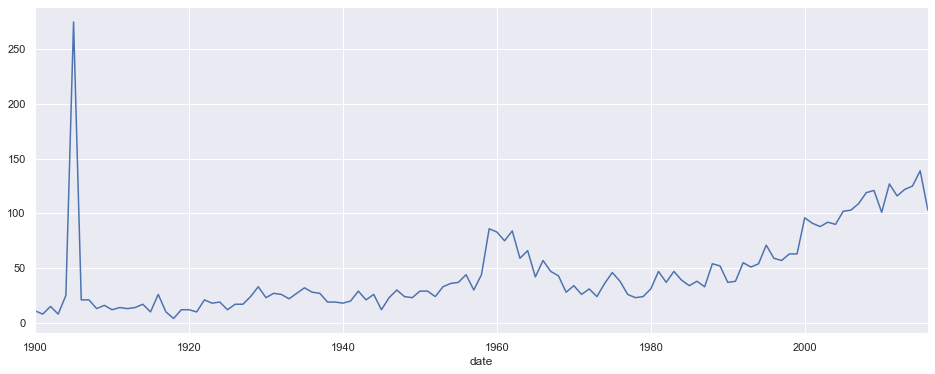

In [32]:
df.groupby(df.date.dt.year)['country'].count().plot(figsize=(16,6))

visualize the countries with the highest number of shark attacks over the dataset period (anything not shown in this figure has a count of 10 or less)

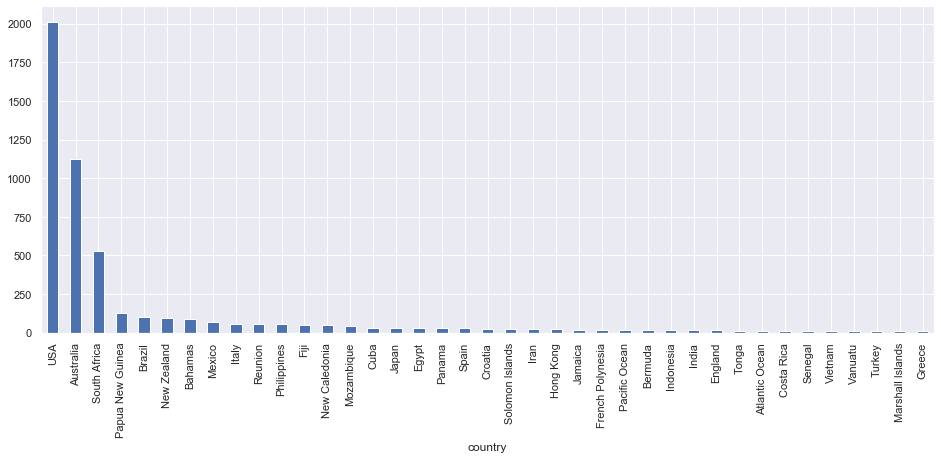

In [33]:
(df.groupby('country')['date'].count()).sort_values(ascending=False).head(39).plot(kind="bar", figsize=(16,6))

In [34]:
# import all necessary libraries to view the data on a world map
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# make a new data frame with the information we need
map_df = df.groupby('country')['date'].count()
new_df = pd.DataFrame(map_df)
# I then exported this data frame to excel where I added the correct country code so plotly can read the country codes
new_df.to_excel('new_df_file.xlsx')
# brought back the adjusted file with the country codes (this has been added to the repository as well)
df_map = pd.read_excel('adjusted_new_df.xlsx')

In [35]:
# check changes
df_map.head()

,country,country2
0,ABW,1
1,AFG,0
2,AGO,0
3,AIA,0
4,ALB,0


Below is an interactive map showing the data (darker color = higher number of shark attacks), info shows on hover.

In [36]:
fig = go.Figure(data=go.Choropleth(
    locations = df_map['country'],
    z = df_map['country2'],
    text = df_map['country'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Number of shark attacks recorded',
))

fig.update_layout(
    title_text='Shark Attacks',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0,
        y=0,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False,
    )]
)

fig.show()

Visualize the number of attacks with regards to the activity the victim was involved in when the attack occurred

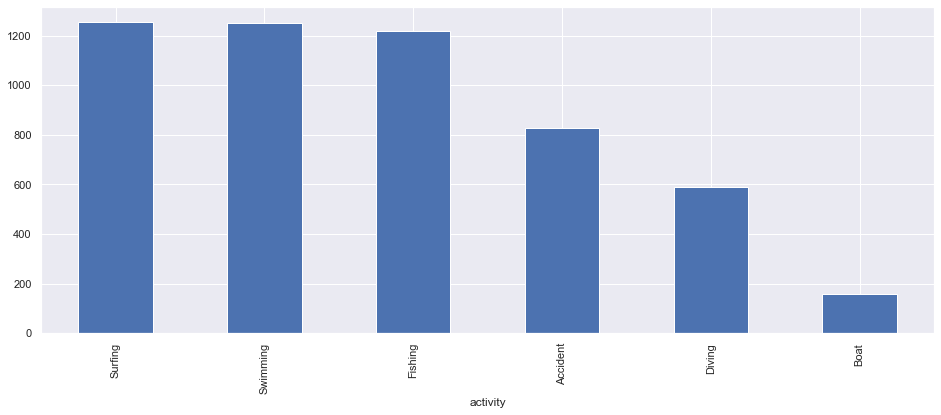

In [37]:
df.groupby('activity')['date'].count().sort_values(ascending=False).plot(kind="bar", figsize=(16,6))

We can also visualize the data with regards to activity, but in terms of the degree of submergion in the water

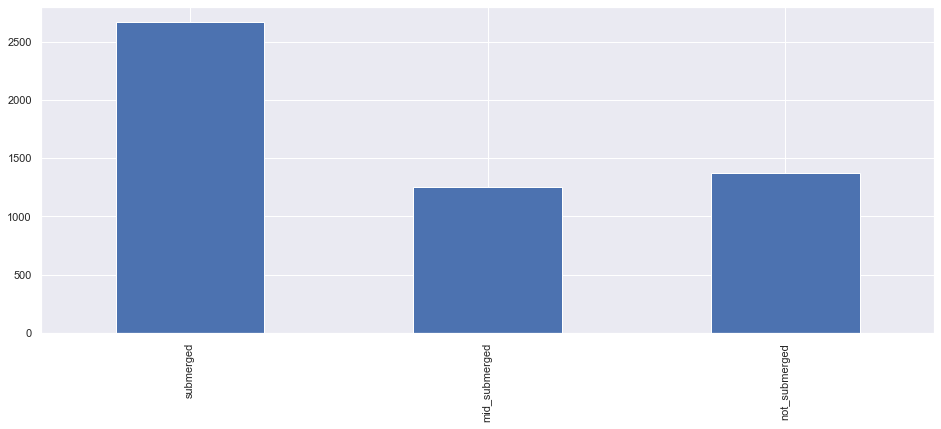

In [38]:
df[['submerged','mid_submerged','not_submerged']].sum().plot(kind="bar", figsize=(16,6))

Next, let's examine how likely it is for a male to be exposed to a shark attack as opposed to a female and find the percentage

In [39]:
(df['is_male'].value_counts(normalize=True) * 100)

1    89.739229
0    10.260771
Name: is_male, dtype: float64

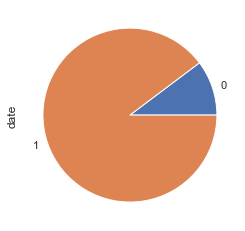

In [40]:
df.groupby('is_male')['date'].count().plot(kind="pie")

Finally, let's visualize how the victim's age correlated with the likelihood of being attacled by a shark

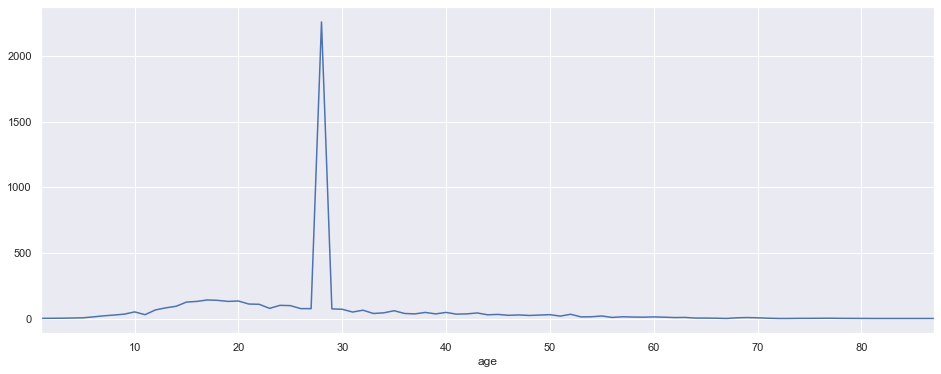

In [41]:
df.groupby('age')['date'].count().plot(figsize=(16,6))

# ---
# Conclusions we can draw from the visualization of our data set:

<h3>- When examining the data chronologically, we can see that there is a slight and steady increase in the number of shark attacks over time, which can be easily explained by the growth of human population and the use of more beaches and open waters around the world, however there are 2 large spikes in data:</h3>
    
    - 1905: where I imagine this was caused by gathering this data, an excersize which was likely not performed before, which would result in large number of reports due to people remembering events from previous years.
    
    - 1959 & 1960: this seemed strange at first, however, after researching the issue further, I found that it is possible this can be attributed to the social movements and social rise of liberal values that drove more people to out-going nature and outdoor events and social venues.

<h3>- USA by far has the most number of occurrances of shark attacks, followed by Australia, and then South Africa, then the number drops significantly for other areas as seen in the chart for countries such as Papua New Guineua, Brazil, New Zeland, etc. This makes sense if the exposure of the country to the ocean is a big stretch of beaches as well as the population of the country</h3>

<h3>- We can observe that the activities most correlated with the number of shark attacks are swimming, surfing, and fishing, followed by accidents, then diving and finally the least correlated was boat related activities. This makes sense in a few ways:</h3>

    - While engaged in activities such as swimming or surfing, the individual does not have full vision or their surroundings, mainly below them, and they can resemble turtles or other sea creatures, which might attract a shark to attack them.
    
    - Divers on the other hand have a better view of their surroundings and it is easier for the shark to recognize that they are not their usual prey, thus somewhat discouraging the shark from attacking.

    - Lastly, boat related activities seem to be safest, which makes sense since the individuals are on a vehicle with a hard surface and they have much more freedom of movement and are more in control of the situation.
    
    * There is an anamoly seen on the submergion level chart, where it shows that mid_submerged has a bigger number of shark attacks than not_submerged, however I accredit that to the fact that my grouping of the activities included boat related activities and fishing, and when an incident occurs in those situations the individual ultimately ends up being submerged in the water (however since I can't determine exactly what the situation was like, I decided to leave them as they are).

<h3>- We can see that the vast majority of individuals involved in these incidents are male, this is to be expected since more males partake in sports such as surfing and sailing than females (please see below source)</h3>

https://www.surfertoday.com/surfing/how-many-surfers-are-there-in-the-world
https://gearjunkie.com/women-fishing-advocacy-access

<h3>- Finally we see that the overwhelming majority of attacks happen to individuals between the ages of 26 and 29, this is to be expected as most young beach goers who participate in activities such as surfing, fishing, swimming, etc.. would logically be in that age group (much younger would be busy with school and early work life, older than that would be busy with family life and further responsibilities (an extra source of information linked below)</h3>

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4639932/

# ---
# In this section, I will try to answer the last question in my introduction (In the scenario of a shark attack occurring, is there any modeling we can do that could predict the likelyhood of surviving the attack given the data in this dataset?)

<h3>- Although I have not yet dived deep enough in the field of predictive modeling and machine learning, I do have a general idea of it, and upon a bit of research I found that Logistic Regression seems to be the best model to use in this study since the outcome we are trying to predict is binary (fatal or not fatal), In this section that is what I will be attempting to accomplish</h3>

First, let's make a new dataframe that we will use for the logistic regression which we will call reg_df

In [42]:
reg_df = df[['submerged','mid_submerged','not_submerged','is_male','age','fatal']].copy()

Perform the train_test_split, this is where we split our data into a training set which will provide the data our model will use to find correlation and a test set which we will use to evaluate our prediction model (this uses the confusion matrix and evaluates accuracy based on (true positive + true negative / total) or (false negative + false positive / total)

In [43]:
# import the train_test_split function from SciKitLearn library
from sklearn.model_selection import train_test_split
# split the data into test and train by 80% to 20% after dropping the dependant variable 'fatal'
X_train, X_test, y_train, y_test = train_test_split(reg_df.drop('fatal', axis=1), 
                                                    reg_df['fatal'], 
                                                    test_size=0.20, 
                                                    random_state=101,)

In [44]:
# import the logistic regression function from SciKitLearn library and assign it to a variable
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
# fit our training and test data into the regression model function
log_reg.fit(X_train, y_train)
# assign our prediction results to a variable
predictions = log_reg.predict(X_test)

Let's evaluate how well our model was able to predict whether an attack would be fatal or not after testing the model on the test data and comparing the results with the actual values in the 'fatal' column of the test data

In [45]:
# import the classification report function from SciKitLearn library and get the report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       821
           1       0.00      0.00      0.00       238

    accuracy                           0.78      1059
   macro avg       0.39      0.50      0.44      1059
weighted avg       0.60      0.78      0.68      1059



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



# ---
# Conclusion:

# 1- I learned a lot of information about the different variables surrounding the shark attacks, and which conditions, characteristics, and activities are more or less likely to have correlation or causation with the likelihood of a shark attack occurring.

# 2- Given this data, and the wonderful libraries and tools available to us in statistical modeling and python, we were able to predict with 78% accuracy the fatality rate of a shark attack incident once it occurs, taking into consideration the different features of data like submergion level, activity, gender, and age.

<h3>* This might not be the most accurate model for such a study, but I cannot help but feel excited and intrigued by the possibilities of what can be achieved with such technologies and methods to serve us in understanding other patterns and events in our daily life.</h3>

# ---
# Limitations:

<h3>It is important to understand that there are limitations which might affect the accuracy and outcome of our study, which might have lead to the 22% error rate in our predictive model as well:</h3>

    - Some activities are vague and do not paint a clear picture of how exposed and vurnarable the individual was when the attack occurred, an example would be 'fishing', as this does not tell us was the individual fishing on a boat and fell into the water, or were they knee deep in the water and were attacked anyway, each of those scenarios would affect the outcome greatly and help us understand the correlation a lot better if it was available.
    
    - I was not able to definitively find the cause of some anamolies in the results of our visualization phase and resorted to making a logical guess, as there simply isn't enough information to find the exact cause of the anamoly. An example would be the spikes in shark attacks in 1905 and 1960, or the fact that the majority of attacks targetted individuals between the ages of 26 and 29.
    
    - Even though I have a fair understanding of a few statistical modeling methods, I'm by no means an expert in the subject and it is fair to assume that with further knowledge, there is a good chance that there might be a better model to use for this type of prediction analysis that would produce a higher accuracy rate.

# ---
# Closing:

<h3>If I managed to keep you present and interested until this point, I sincerely thank you and I truly hope that I was able to provide you with some degree of insight and useful knowledge =)</h3>